### Code for downloading ASCAT winds, as well as converting them to NETCDF

In [2]:
#load classification table
#for each classification, gete the ASCAT winds from the same time

In [13]:
import os
import pandas as pd
import xarray as xr
import glob
import numpy as np
import matplotlib.pyplot as plt

In [4]:
classification_file=r'/home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_region/unified_table.csv'
class_df = pd.read_csv(classification_file, index_col=0).drop(columns=['refl_img', 'context_img'])
class_df['lon'] = class_df['lon']%360
class_df['datetime'] = [dt.datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in class_df['date']]
labels={0: 'Closed-cellular MCC', 1: 'Clustered cumulus', 2: 'Disorganized MCC',
        3: 'Open-cellular MCC', 4: 'Solid Stratus', 5: 'Suppressed Cu'}
short_labels = {0: 'Closed MCC ', 1: 'Clust. Cu', 2: 'Disorg. MCC',
        3: 'Open MCC', 4: 'Solid St', 5: 'Supp. Cu'}

FileNotFoundError: [Errno 2] File /home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_region/unified_table.csv does not exist: '/home/disk/eos4/jkcm/Data/MEASURES/beta_data/cset_region/unified_table.csv'

In [2]:
cat_i =  class_df.loc[5]
lat, lon, time = cat_i['lat'], cat_i['lon'], cat_i['datetime']

NameError: name 'class_df' is not defined

In [14]:
# def get_ASCAT_winds(lat, lon, time):
if True:
    folder = f'/home/disk/eos9/jkcm/Data/ascat/25km/2015/024'
    df = xr.open_mfdataset(glob.glob(os.path.join(folder, '*.nc')), concat_dim='NUMROWS')
    mean_grad = np.gradient(df.lat, axis=0).mean(axis=1)
    dec_branch = np.nonzero(mean_grad<0)
    lons, lats, wspds = df.lon.values[dec_branch], df.lat.values[dec_branch], df.wind_speed.values[dec_branch]
#     weirdbad = np.isnan(wspds).all(axis=1)
#     lons, lats, wspds = lons[~weirdbad], lats[~weirdbad], wspds[~weirdbad]

/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/disk/p/jkcm/anaconda3/envs/classified-cset/lib/python3.7/site-packages/xarray/backends/api.py:934: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  f

In [15]:
df

<xarray.Dataset>
Dimensions:           (NUMCELLS: 42, NUMROWS: 22704)
Coordinates:
    lat               (NUMROWS, NUMCELLS) float64 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    lon               (NUMROWS, NUMCELLS) float64 dask.array<chunksize=(1632, 42), meta=np.ndarray>
Dimensions without coordinates: NUMCELLS, NUMROWS
Data variables:
    time              (NUMROWS, NUMCELLS) datetime64[ns] dask.array<chunksize=(1632, 42), meta=np.ndarray>
    wvc_index         (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    model_speed       (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    model_dir         (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    ice_prob          (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    ice_age           (NUMROWS, NUMCELLS) float32 dask.array<chunksize=(1632, 42), meta=np.ndarray>
    wvc_quality_flag  (NUMROWS, NUMCELLS) fl

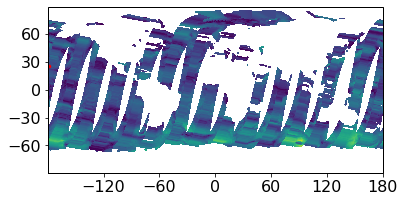

In [113]:
from cartopy import config
import cartopy.crs as ccrs

f = np.abs(np.gradient(lons, axis=0))>10
lons_n, lats_n = lons.copy(), lats.copy()
lons_n[f] = np.nan
lats_n[f] = np.nan

ax = plt.axes(projection=ccrs.PlateCarree())

ax.pcolormesh(lons, lats, wspds, transform=ccrs.PlateCarree())
ax.set_xticks([-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
ax.plot(lon, lat, 'r.', ms=5, transform=ccrs.PlateCarree())

# plt.plot(lon, lat, 'r.', ms=100)

In [227]:
# months = [f'm{i+1:02}' for i in range(12)]
# for month in months:
if False:
# month = 'm01'

    savedir = f'/home/disk/eos9/jkcm/Data/ascat/rss/2015/all/ascat_unified_{month}.nc'


    mdir =f'/home/disk/eos9/jkcm/Data/ascat/rss/2015/{month}/'
    test_files = [os.path.join(mdir, f) for f in os.listdir(mdir) 
                 if re.match(r'ascat_[0-9]{8}_v02.1.gz', f)]
    print(len(test_files))
    test_dates = [dt.datetime.strptime(os.path.basename(i)[6:14], '%Y%m%d') for i in test_files]
    datasets = [read_data(i) for i in test_files]
    print('finished reading in datasets')
    assert [np.allclose(i.variables['latitude'],datasets[0].variables['latitude']) for i in datasets]
    assert [np.allclose(i.variables['longitude'],datasets[0].variables['longitude']) for i in datasets]
    ds = xr.Dataset()
    ds['time'] = test_dates
    ds['latitude'] = datasets[0].variables['latitude']
    ds['longitude'] = datasets[0].variables['longitude']
    ds['orbit_segment'] = np.arange(2)
    for k, v in datasets[0].variables.items():
        if len(v.shape) == 3:
            concat_var = np.array([i.variables[k] for i in datasets])
            concat_var[concat_var<v.valid_min] = np.nan
            concat_var[concat_var>v.valid_max] = np.nan
            ds[k] = (('time', 'orbit_segment', 'latitude', 'longitude'), concat_var)
        attrs = dict(long_name = v.long_name, units=v.units, valid_min=v.valid_min, valid_max=v.valid_max)
        if type(v.valid_min) == bool:
            attrs['valid_min'] = int(attrs['valid_min'])
            attrs['valid_max'] = int(attrs['valid_max'])
        ds[k].attrs = attrs
    ds.attrs['creation date'] = str(dt.datetime.utcnow())
    ds.attrs['comments'] = "netcdf created by jkcm@uw.edu, adapted from bytemaps from Remote Sensing Systems. " +\
                            "http://remss.com/missions/ascat/"
    print(f'saving {month}')
    ds.to_netcdf(savedir)

31
finished reading in datasets
saving m01
28
finished reading in datasets
saving m02
31
finished reading in datasets
saving m03
30
finished reading in datasets
saving m04
31
finished reading in datasets
saving m05
30
finished reading in datasets
saving m06
31
finished reading in datasets
saving m07
31
finished reading in datasets
saving m08
30
finished reading in datasets
saving m09
31
finished reading in datasets
saving m10
30
finished reading in datasets
saving m11
31
finished reading in datasets
saving m12


In [28]:
test_file = r'/home/disk/eos9/jkcm/Data/ascat/rss/all/ascat_unified_2014-01.nc'
ds = xr.open_dataset(test_file)  

In [74]:
def get_div_from_x_y(x, y, lat, lon):
    lat_dim = np.nonzero(np.array(x.shape) == lat.shape)[0][0]
    lon_dim = np.nonzero(np.array(y.shape) == lon.shape)[0][0]    
    dudi = np.gradient(x)[lon_dim]
    dvdj = np.gradient(y)[lat_dim]
    dlatdy = 360/4.000786e7  # degrees lat per meter y
    def get_dlondx(lat) : return(360/(np.cos(np.deg2rad(lat))*4.0075017e7))
    dlondx = get_dlondx(lat)
    lat_spaces = np.diff(lat)
    lon_spaces = np.diff(lon)
    assert(np.allclose(lat_spaces, lat_spaces[0], atol=0.01) and np.allclose(lon_spaces, lon_spaces[0], atol=0.05))
    dlondi = np.mean(lon_spaces)
    dlatdj = np.mean(lat_spaces)
    dudx = dudi/dlondi*dlondx[:, None]
    dvdy = dvdj/dlatdj*dlatdy
    div = dudx + dvdy
    return div


rho = ds.windspd
phi = ds.winddir
x = rho*np.cos(np.deg2rad((-phi+90)%360))
y = rho*np.sin(np.deg2rad((-phi+90)%360))
lat = ds.coords['latitude'].values
lon = ds.coords['longitude'].values
div = get_div_from_x_y(x, y, lat, lon)
ds['div'] = (ds.windspd.dims, div_s)
ds['div'] = ds['div'].assign_attrs(
                {"long_name": "scatterometer divergence",
                 "units": "s**-1",
                 "_FillValue": "NaN"})

In [93]:
new_lat5 = np.arange(-90, 90.5, 0.5)
new_lon5 = np.arange(0, 360, 0.5)
new_x5 = x.interp(latitude=new_lat5, longitude=new_lon5, method='linear')
new_y5 = y.interp(latitude=new_lat5, longitude=new_lon5, method='linear')
new_div5 = get_div_from_x_y(new_x5, new_y5, new_lat5, new_lon5)
new_lat = np.arange(-90, 91, 1)
new_lon = np.arange(0, 360, 1)
new_x = x.interp(latitude=new_lat, longitude=new_lon, method='linear')
new_y = y.interp(latitude=new_lat, longitude=new_lon, method='linear')
new_div = get_div_from_x_y(new_x, new_y, new_lat, new_lon)

In [ ]:
fig, ax = plt.subplots(nrows=3, figsize=(20,30))
pc = ax[0].imshow(div[0, 0, ::-1, :]*1e5, vmin=-5, vmax=5)
ax[0].imshow(div[0, 1, ::-1, :]*1e5, vmin=-5, vmax=5)
plt.colorbar(pc)
ax[1].imshow(new_div5[0, 0, ::-1, :]*86400, vmin=-2, vmax=2)
ax[1].imshow(new_div5[0, 1, ::-1, :]*86400, vmin=-2, vmax=2)
ax[2].imshow(new_div[0, 0, ::-1, :]*86400, vmin=-2, vmax=2)
ax[2].imshow(new_div[0, 1, ::-1, :]*86400, vmin=-2, vmax=2)

In [59]:
def convert_amsr_to_netcdf():
    data_reader = make_amsr_data_reader()
    basefolder = '/home/disk/eos9/jkcm/Data/amsr/rss/'
    for year in [2014, 2015, 2016][0:1]:
        for month in [f'{i+1:02}' for i in range(12)][0:1]:
            save_name = os.path.join(basefolder, 'all', f'amsr_unified_{year}-{month}.nc')
            files = sorted(glob.glob(os.path.join(basefolder, f'f34_{year}{month}[0-9][0-9]v8.gz')))
            dates = [dt.datetime.strptime(os.path.basename(i)[4:12], '%Y%m%d') for i in files]
            ds = convert_files_to_netcdf(files, dates, data_reader)
            ds.attrs['comments'] = "netcdf created by jkcm@uw.edu, adapted from bytemaps from Remote Sensing Systems. " +\
                                "http://remss.com/missions/amsr/"
            comp = dict(zlib=True, complevel=2)
            ds.to_netcdf(save_name, engine='h5netcdf', encoding={var: comp for var in ds.data_vars})
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
